In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Get All Possible Mutations
Using the matrix data, grab all possible mutations

In [2]:
matrix_df = pd.read_csv('/Users/nathanielblack/Downloads/MatrixGenomDt_Mt_T.csv', sep ='\t', index_col=False)
all_mutations = [mut for mut in matrix_df.columns if mut != 'Mut']

#Get the IDs We Use in Viz2
- Load the data used in Viz2
- Pivot the data so we have a column for each *Sample* with the *Clinical_Significance* as the value

In [3]:
genomic_df = pd.read_csv('/Users/nathanielblack/Downloads/genomicDtMt.csv')

In [4]:
all_mutations = pd.DataFrame(all_mutations, columns=['Mut'])

In [5]:
severity_map = {0:0,1:255,2:1,3:2,4:-1,5:-2}
genomic_df['Severity'] = genomic_df['Clinical_Significance'].map(severity_map)
people_columns = genomic_df.pivot_table(index = 'Mut', columns='Sample', values='Severity')
people_columns = people_columns.reset_index()

#Combine All Mutations and Viz2 Data
- Left join the viz2 data to the all mutation data
- Replace NA with 0

Result will be a matrix of mutation by person with severity as the values

In [6]:
mut_by_person_df = all_mutations.merge(people_columns, how='left', on='Mut')
mut_by_person_df.fillna(0, inplace=True)
mut_by_person_df.set_index('Mut', inplace=True)

#Add Population Info
- create an ID to population map
- Append the population info to the mutation by person matrix

In [7]:
population_info = genomic_df[['Sample','Population']].drop_duplicates()
pop_df = mut_by_person_df.T
pop_df['Sample'] = pop_df.index
pop_df = pop_df.merge(population_info, how='left', on='Sample')
pop_df.set_index(['Population','Sample'], inplace=True)

#Heatmap
We now have a dataframe that can be used as a heatmap

********************GBR********************


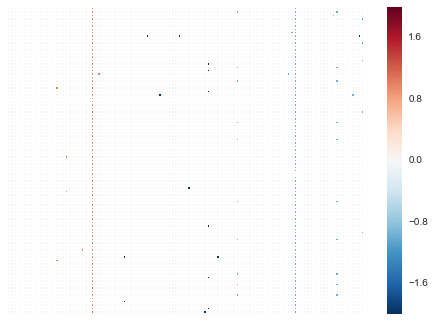

********************FIN********************


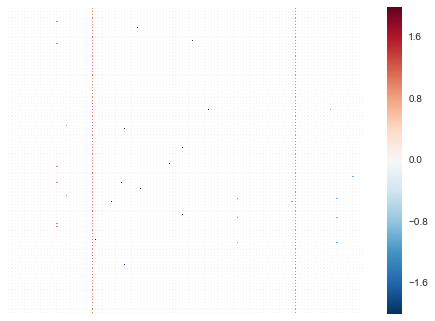

********************CHS********************


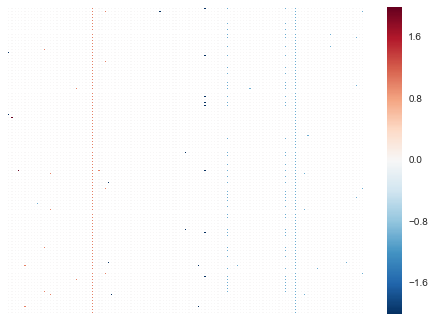

********************PUR********************


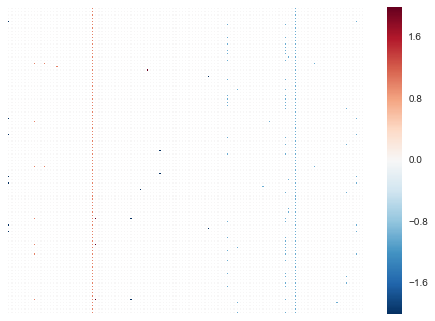

********************CDX********************


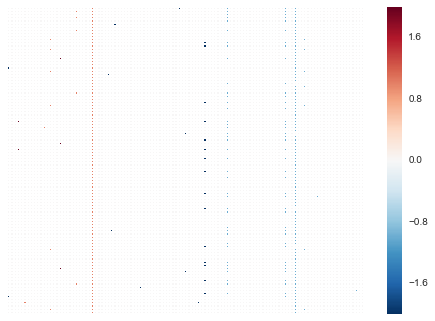

********************CLM********************


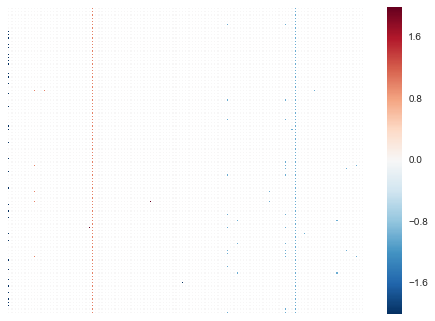

********************IBS********************


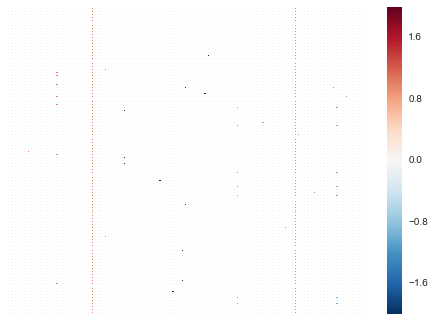

********************PEL********************


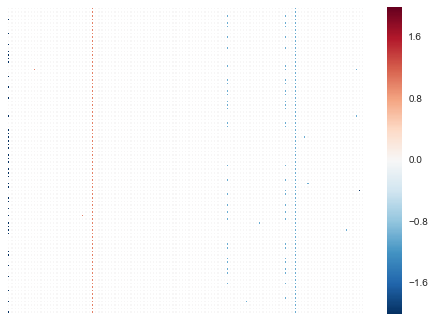

********************PJL********************


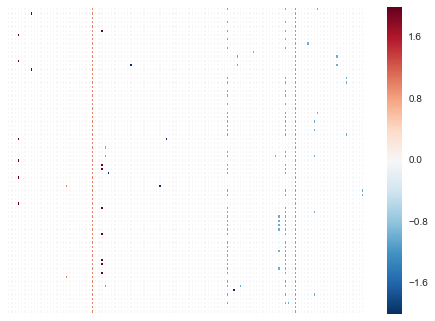

********************KHV********************


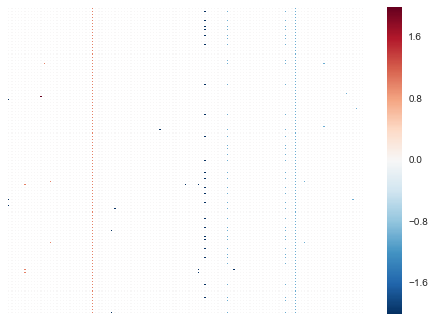

********************ACB********************


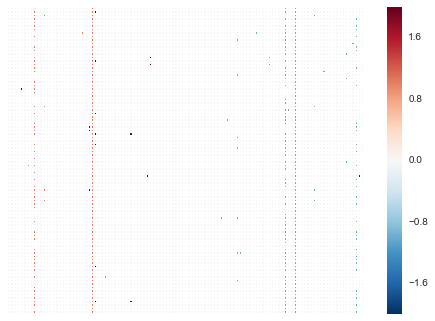

********************GWD********************


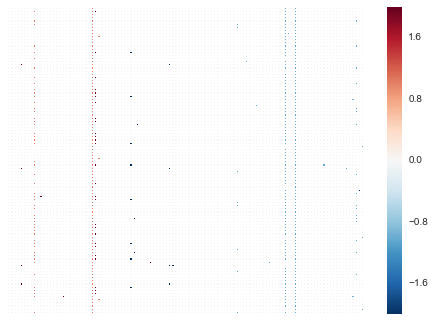

********************ESN********************


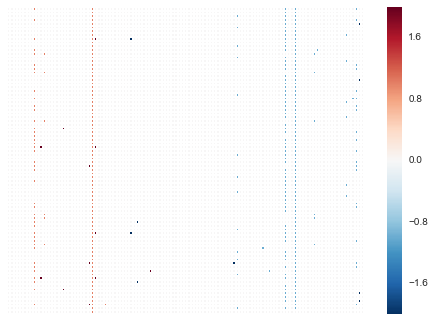

********************BEB********************


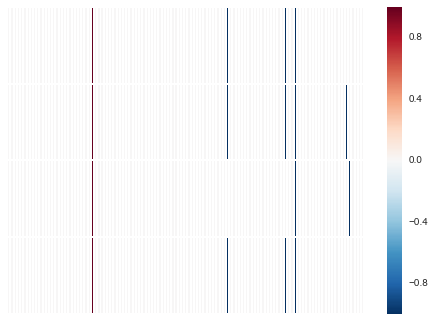

********************MSL********************


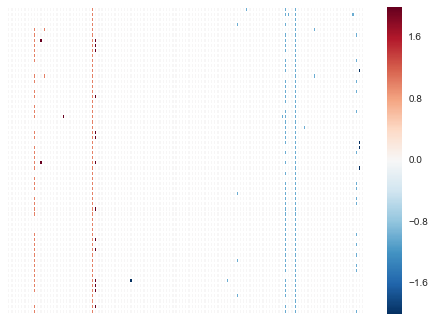

In [8]:
for pop in genomic_df.Population.unique().tolist()[:-1]:
    print "*"*20 + pop + "*"*20
    ax = sns.heatmap(pop_df.ix[pop])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    plt.ylabel('Person')
    plt.xlabel('Mutation')
    plt.show();

In [9]:
pop_df.head()

Mut                 chrMT-827-G  chrMT-951-A  chrMT-961-CG  chrMT-980-C  \
Population Sample                                                         
GBR        HG00096            0            0             0            0   
           HG00097            0            0             0            0   
           HG00099            0            0             0            0   
           HG00100            0            0             0            0   
           HG00101            0            0             0            0   

Mut                 chrMT-990-C  chrMT-1005-C  chrMT-1007-A  chrMT-1008-G  \
Population Sample                                                           
GBR        HG00096            0             0             0             0   
           HG00097            0             0             0             0   
           HG00099            0             0             0             0   
           HG00100            0             0             0             0   
           HG00101            0             0             0             0   

Mut                 chrMT-1018-A  chrMT-1027-G      ...        chrMT-15553-A  \
Population Sample                                   ...                        
GBR        HG00096             0             0      ...                    0   
           HG00097             0             0      ...                    0   
           HG00099             0             0      ...                   -1   
           HG00100             0             0      ...                    0   
           HG00101             0             0      ...                    0   

Mut                 chrMT-15607-G  chrMT-15637-T  chrMT-15649-G  \
Population Sample                                                 
GBR        HG00096              0              0              0   
           HG00097             -1              0              0   
           HG00099              0              0              0   
           HG00100              0              0              0   
           HG00101              0              0              0   

Mut                 chrMT-15670-C  chrMT-15682-G  chrMT-15758-G  \
Population Sample                                                 
GBR        HG00096              0              0              0   
           HG00097              0              0              0   
           HG00099              0              0              0   
           HG00100              0              0              0   
           HG00101              0              0              0   

Mut                 chrMT-15784-C  chrMT-15812-A  chrMT-15927-A  
Population Sample                                                
GBR        HG00096              0              0              0  
           HG00097              0              0              0  
           HG00099              0              0              0  
           HG00100              0              0             -1  
           HG00101              0              0              0  

[5 rows x 111 columns]

In [10]:
pop_df.reset_index(inplace=True)
melt_vars = [col for col in pop_df.columns if col not in ['Population', 'Sample']]
pop_df = pd.melt(pop_df, id_vars=['Population','Sample'], value_vars = melt_vars, value_name = 'Severity')

In [11]:
out = pop_df.copy(deep=True)
out.sort(['Mut'])
out['col'] = pd.Categorical(out.Mut).codes

In [12]:
out.head()

,Population,Sample,Mut,Severity,col
0,GBR,HG00096,chrMT-827-G,0,102
1,GBR,HG00097,chrMT-827-G,0,102
2,GBR,HG00099,chrMT-827-G,0,102
3,GBR,HG00100,chrMT-827-G,0,102
4,GBR,HG00101,chrMT-827-G,0,102


In [21]:
gbr = out[out.Population == 'GBR'].copy(deep=True)

In [23]:
gbr['row'] = pd.Categorical(gbr.Sample).codes

In [50]:
for pop in genomic_df.Population.unique().tolist()[:-1]:
    df = out[out['Population'] == pop]
    df = df[['Population','Severity','row','col']]
    df.to_csv('/Users/nathanielblack/Downloads/heatmap/' + pop + '.csv', index)

In [26]:
gbr = gbr[gbr.Severity != 0]

In [27]:
gbr.head()

,Population,Sample,Mut,Severity,col,row
19118,GBR,HG00121,chrMT-1189-C,1,16,23
19185,GBR,HG00255,chrMT-1189-C,1,16,73
22957,GBR,HG00148,chrMT-1243-C,1,24,43
22984,GBR,HG00231,chrMT-1243-C,1,24,53
29366,GBR,HG00252,chrMT-1393-A,1,32,70


In [25]:
gbr.row.max()

88

In [28]:
gbr.to_csv('/Users/nathanielblack/Dropbox/d3/gbr.csv', index=False)

In [31]:
fin = out[out.Population == 'FIN'].copy(deep=True)
fin['row'] = pd.Categorical(fin.Sample).codes
fin.row.max()

96

In [32]:
fin = fin[fin.Severity != 0]
fin.to_csv('/Users/nathanielblack/Dropbox/d3/fin.csv', index=False)

In [33]:
pjl = out[out.Population == 'PJL'].copy(deep=True)
pjl['row'] = pd.Categorical(pjl.Sample).codes
pjl.row.max()

70

In [34]:
pjl = pjl[pjl.Severity != 0]
pjl.to_csv('/Users/nathanielblack/Dropbox/d3/pjl.csv', index=False)